# ECON 103 - Problem Set 4

This problem set is devoted to the study the properties of the simple regression model discussed in Chapters 5 and 6.

You will need the following datasets from the course website or the below link (which have uploaded for you):

1.  `london.dta`
2.  `commute.dta`
3.  `cocaine.dta`
4.  `cps4csmall.dta`
5.  `cobb.dta`
6.  `tuna.dta`

You can review how to load a dataset in `R` by checking the Section 0 of the Jupiter Notebook called `Week_4_Econ_103_Lab_Class.ipynb` 

## Due: Tuesday, May 17, 2022

It is useful to load the folowing lybraries for the problem set:

## Question 1 (5.3, Page 200)

Consider the following model that relates the proportion of a household’s budget spent on alcohol ($WALC$) to total expenditure ($TOTEXP$), age of the household head ($AGE$), and the number of children in the household ($NK$):


$$WALC = \beta_1 +\beta_2 \ln(TOTXP) + \beta_3AGE + \beta_4 NK + e$$

The data in the file `london.dta` were used to estimate this model. See Exercise 4.10 on page 159 for more details about the data. Note that only households with one or two children are being considered. Thus, $NK$ takes only the values one or two. Output from estimating this equation appears in Table 5.6 displayed below:

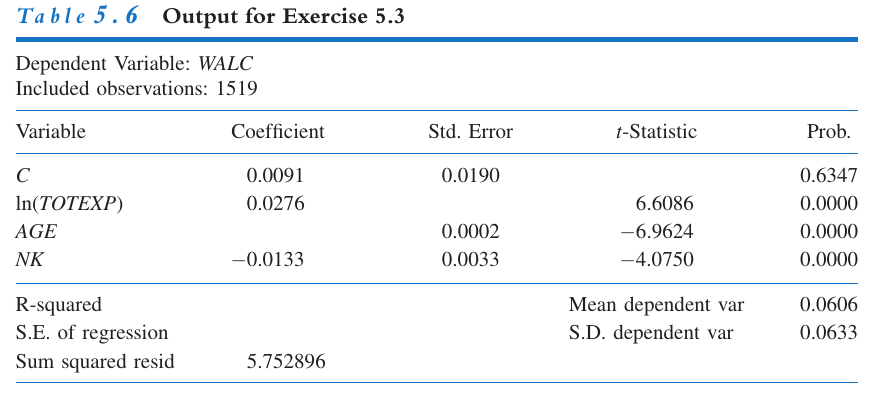

>(a) Indicate how to obtain the blank spaces in table 5.3: <br>
(just show the formula based on the values present in the table) <br>
- (i) The t-statistic for $\hat{b}_1$; 
- (ii) The standard error for $b_2$; 
- (iii) The estimate $b_3$; 
- (iv) $R^2$; 
- (v) $\hat{\sigma}$<br>
<br>

>(b) Interpret the estimate for $b_4.$
<br>

>(c) What is the 95\% interval estimate for $b_3$? <br>
The code also shows using the R function `confint(model, parm, level)`.<br>
See Jupiter Notebook `Week 6 Econ 103 Lab Class 2021` for an example.

<br>

>(d) What is the $p$-value for testing the hypothesis that the budget proportion for alcohol does not depend on the number of children in the household? Can you suggest a reason for the test outcome?

In [ ]:
# (a) Indicator the formulas for each of the items in (a) here
# All formulas are based on the values displayed in the regression output

# (i)

# (ii)


# (iii)


# (iv)

# (v)



(b)

(c) 

(d)

In [ ]:
# The regression is displayed below
library(PoEdata) # Access the Data Library
data(london)       # Specify the Data we will use
names(london)      # displays the names of the variables in the data set  
#head(london)       # Displays the first 10 rows of data
#summary(london)    # Basic Statistical description of the data
Reg1 <- lm(formula = walc ~ log(totexp) + age + nk,data = london)
summary(Reg1)
confint(Reg1, parm=c("log(totexp)", "age", "nk"),level=0.95)

## Question 2 (q. 5.12, page 204)

The file `cocaine.dta` contains 56 observations on variables related to sales of cocaine powder in northeastern California over the period 1984–1991. The data are a subset of those used in the study, Caulkins, J. P. and R. Padman (1993),
"Quantity Discounts and Quality Premia for Illicit Drugs," `Journal of the American Statistical Association, 88, 748–757`. 
The variables are:

$PRICE$ = price per gram in dollars for a cocaine sale
<br>
$QUANT$ = number of grams of cocaine in a given sale
<br>
$QUAL$ = quality of the cocaine expressed as percentage purity
<br>
$TREND$ = a time variable with 1984 = 1 up to 1991 = 8
<br>

Consider the regression model:

$$ PRICE = \beta_1 + \beta_2 QUANT + \beta_3 QUAL + \beta_4 TREND + \epsilon $$

The R output associated with this regression is shown below:

>(a) What signs would you expect on the coefficients $b_2, b_3,$ and $b_4$?
<br>

>(c) What proportion of variation in cocaine price is explained jointly by variation in quantity, quality, and time?<br>
(In summary, what is the $R^2$ of the regression?)
<br>

>(e) Test the hypothesis that the quality of cocaine has no influence on price against the alternative that a premium is paid for better-quality cocaine, that is, $H_0: \:\beta_3 \le 0 \text{ and }H_1: \beta_3 > 0.$<br>
(See code below for a tip)<br>


>(f) What is the average annual change in the cocaine price? 

(a)

(c)

(e)

(f)

In [ ]:
library(PoEdata) # Access the Data Library
data(cocaine)       # Specify the Data we will use
names(cocaine)      # displays the names of the variables in the data set  
Reg2 <- lm(formula = price ~ quant + qual + trend,data = cocaine)
summary(Reg2)

# Testing H0: quant=0 versus qual <> 0 using the F-statistic
(test <- linearHypothesis(Reg2, "quant=0"))
# Testing H0: quant=0 versus quant <> 0 using the t-statistic
(seL  <- svycontrast(Reg2, c(0, 1, 0, 0))) # (Intercept, quant, qual, trend)
tval  <- seL[1]/SE(seL)[1]
tval
 df   <- Reg2$df.residual
tc    <- qt(0.975, df)
tc
pval  <- 2*(1-pt(abs(tval), df))
pval

# Testing H0: quant=0 versus quant > 0 using the t-statistic
(seL  <- svycontrast(Reg2, c(0, 1, 0, 0))) # (Intercept, quant, qual, trend)
tval  <- seL[1]/SE(seL)[1]
tval
 df   <- Reg2$df.residual
tc    <- qt(0.95, df)
tc
pval  <- 1-pt(tval, df)
pval


## Question 3 (q. 5.21, page 204)

Each morning between 6:30AM and 8:00AM, Bill leaves the Melbourne suburb of Carnegie to drive to work at the University of Melbourne. The time it takes Bill to drive to work ($TIME$) depends on the departure time ($DEPART$), the number of red lights that he encounters ($TREDS$), and the number of trains that he has to wait for at the Murrumbeena level crossing ($TRAINS$). Observations on these variables for the 231 working days in 2006 appear in the file `commute.dta`. $TIME$ is measured in minutes. $DEPART$ is the number of minutes after 6:30AM that Bill departs.

Consider the regression:

$$ TIME = \beta_1+\beta_2 DEPART + \beta_3 TREDS + \beta_4 TRAINS + \epsilon,$$

The R output associated with this regression is shown below:

>(b) Obtain 95\% interval for each of the estimates<br>
(Tip: use the command `confint()` above)

>(c) Using a 5\% significance level, test the hypothesis that each red light delays Bill by two minutes or more against the alternative that the delay is less than 2 minutes.<br>
$H_0: \beta_3 \ge 2$ and $H_1: \beta_3 < 2$<br>
(See codes below)<br>

>(d) Using a 10\% significance level, test the hypothesis that each train delays Bill by 3 minutes.<br>
$H_0: \beta_4 = 3$ and $H_1: \beta_4 \ne 3$.

(b)

(c)

(d)

In [ ]:
library(PoEdata) # Access the Data Library
data(commute)       # Specify the Data we will use
names(commute)      # displays the names of the variables in the data set  
Reg3 <- lm(formula = time ~ depart + reds + trains,  data = commute)
summ(Reg3)

confint(Reg3, parm=c("(Intercept)","depart"),level=0.95)


# Testing $H_0: \beta_3 > 1$ and $H_1: \beta_3 < 1$ using the t-statistic
# At significance level of 5%
(seL  <- svycontrast(Reg3, c(0, 0, 0, 1))) # (Intercept, depart, reds, trains)
c     <- 1
tval  <- (seL[1]-c)/SE(seL)[1]
tval
(df   <- Reg3$df.residual)
alpha  <- 0.05
tc    <- qt(1-alpha, df)
tc
pval  <- pt(tval, df)
pval
 
# Testing $H_0: \beta_3 > 4$ and $H_1: \beta_3 < 4$ using the t-statistic
# At significance level of 10%
(seL  <- svycontrast(Reg3, c(0, 0, 0, 1))) # (Intercept, depart, reds, trains)
c     <- 4
tval  <- (seL[1]-c)/SE(seL)[1]
tval
(df   <- Reg3$df.residual)
alpha  <- 0.10
tc    <- qt(1-alpha, df)
tc
pval  <- pt(tval, df)
pval

## Question 5 (q. 6.7, page 248) 

Table 6.5 contains output for the two models:
\begin{align*}
Y &=\beta_1 + \beta_2 x + \beta_3 w + \epsilon \\
Y &= \beta_1^* + \beta_2^* x + \epsilon \\
\end{align*}
obtained using $N = 35$ observations. 

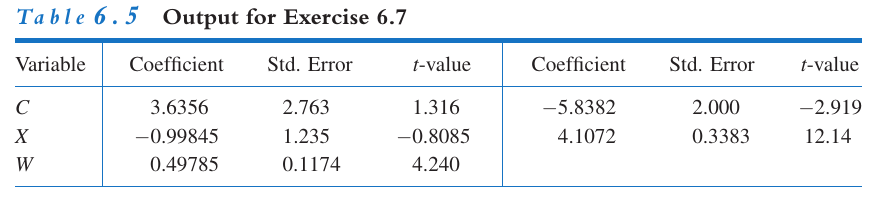

RESET applied to the second model yields F-values of $17.98$ (for $\hat{y}^2$) and 8.72 (for $\hat{y}^2$ and $\hat{y}^3$). The correlation between $x$ and $w$ is
$r_{xw}=0.975.$  Discuss the following questions:<br>

(This is a question abput interpretation, no need to run any regression)

>(a) Should $w$ be included in the model?
<br>

>(b) What can you say about omitted-variable bias?
<br>

>(c) What can you say about the existence of collinearity and its possible effect?

(a)

(b)

(c)

## Question 6 (q. 6.8, page 248) 

Test the joint null hypothesis below using the data ``:

$$H_0 :\beta_3 + 3.8 \beta_4 = 1 \quad \text{ and } \quad \beta_1 + 6 \beta_2 + 1.9 \beta_3 + 3.61 \beta_4 = 80$$

in the model

$$SALES = \beta_1 + \beta_2 PRICE + \beta_3 ADVERT + \beta_4 ADVERT^2 + \epsilon$$


In [ ]:
library(car)  # To use function linearHypothesis()
library(PoEdata) # Access the Data Library
data(andy)
names(andy)
Reg4    <- lm(sales~price+advert+I(advert^2), data=andy)
#library(xtable) #makes data frame for kable
#library(knitr)  #for referenced tables with kable()
#library(broom) #for tidy lm output and function glance()
library(jtools) #for short display of the regression
summ(Reg4)

# F - Joint Test: H0: beta3=0 and  beta4 = 0 versus H1: beta3<>0 or  beta4 <> 0
JointHypothesis <- c("advert=0", "I(advert^2)=0")
kable(linearHypothesis(Reg4,JointHypothesis))

# F - Joint Test: H0: -10*beta2 + 3*beta3=Intecept and  beta3 + 5*beta4 = 0 
# versus H1: -10*beta2 + beta3<>Intecept or  beta3 + beta4 <> 0 
JointHypothesis <- c("-10*price + 3*advert-(Intercept)=0", "advert + 5*I(advert^2)=0")
kable(linearHypothesis(Reg4,JointHypothesis))



## Question 7 (q. 6.11, page 249) 

Consider production functions of the form:

$$Q=f(L,K)$$

where $Q$ is the output measure and $L$ and $K$ are labor and capital inputs, respectively. A popular functional form in economics is the Cobb–Douglas equation:

$$ln(Q) = \beta_1 + \beta_2 ln(L) + \beta_3 ln(K)+ \epsilon$$

Use R and the data in the file `cobb.dta` to estimate this Cobb–Douglas production function. Discuss the following questions.

>(a) Is there evidence of collinearity?<br>
(See Section 5 of the notebook `Week 7 and 8 Econ 103 Lab Class.ipynb`)
<br>

>(b) Re-estimate the model with the restriction of constant returns to scale—that is, $\beta_2 + \beta_3 = 1$ and comment on the results. <br>
(See tip below)<br>
(See also Section 2 of the notebook `Week 7 and 8 Econ 103 Lab Class.ipynb`)<br>


(a)

(b)

In [ ]:
library(PoEdata) # Access the Data Library
data(cobb)
names(cobb)
Reg    <- lm(log(q)~log(l)+log(k), data=cobb)
library(jtools) #for short display of the regression
summ(Reg)
LK <- log(cobb$k)
LL <- log(cobb$l)
LQ <- log(cobb$q)

(cor(log(LQ),log(LK)))
(cor(log(LQ),log(LL)))
(cor(log(LK),log(LL)))


JointHypothesis <- c("log(l) + log(k) =1")
kable(linearHypothesis(Reg,JointHypothesis))


# Note that if 𝛽2+𝛽3=1, then:
#   LQ       =  b1 + b2*LL + (1-b2)LK + e
#-> (LQ -LK) =  b1 + b2*(LL - LK) + e


Reg2    <- lm(I(LQ - LK)~I(LL-LK), data=cobb)
library(jtools) #for short display of the regression
summ(Reg2)
